In [7]:
import joblib
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load pre-trained models
heart_model = joblib.load('/content/random_forest_heart.pkl')
diabetes_model = joblib.load('/content/random_forest_diabetes.pkl')
stroke_model = joblib.load('/content/random_forest_stroke (1).pkl')

# Load the scaler
try:
    scaler = joblib.load('minmax_scaler.pkl')
except FileNotFoundError:
    print("Scaler file not found. Fitting scaler to training data...")
    # Assuming you have access to the training data here as 'df_train'
    # Replace 'df_train' with your actual training data DataFrame
    # and adjust the column names if necessary.
    # For demonstration purposes, I'm creating a sample DataFrame:
    df_train = pd.DataFrame({
        'BMI': [25, 30, 22, 28],
        'GenHlth': [3, 4, 2, 3],
        'MentHlth': [5, 10, 2, 8],
        'PhysHlth': [10, 15, 5, 12],
        'Age': [45, 55, 35, 50],
        'Education': [4, 5, 3, 4],
        'Income': [6, 7, 4, 6]
    })

    numerical_columns = ['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']
    scaler = MinMaxScaler()
    scaler.fit(df_train[numerical_columns])
    joblib.dump(scaler, 'minmax_scaler.pkl') # Save the fitted scaler for future use.

# Selected features for each model (ensure these match the training script)
heart_features = ['Age', 'GenHlth', 'PhysHlth', 'HighBP', 'Income', 'Education', 'HighChol', 'DiffWalk', 'Sex', 'BMI', 'Diabetes', 'Stroke', 'MentHlth', 'Smoker']
diabetes_features = ['GenHlth', 'BMI', 'Age', 'HighBP', 'PhysHlth', 'Income', 'HighChol', 'Education', 'DiffWalk', 'MentHlth', 'HeartDiseaseorAttack']
stroke_features = ['GenHlth', 'Age', 'PhysHlth', 'Income', 'Education', 'HeartDiseaseorAttack', 'DiffWalk', 'HighBP', 'MentHlth', 'BMI', 'HighChol']

# User input collection function
def get_user_input(prompt_details):
    print("Provide the following details:")
    user_input = {}
    for key, prompt in prompt_details.items():
        user_input[key] = float(input(prompt)) if key in ['BMI', 'Age'] else int(input(prompt))
    return user_input

# Prediction function with input conversion and scaling
def predict_with_conversion(model, user_input, selected_features):
    # Convert user input into a DataFrame
    user_input_df = pd.DataFrame([user_input])

    # Scale numerical inputs
    numerical_columns = ['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']
    user_input_df[numerical_columns] = scaler.transform(user_input_df[numerical_columns])

    # Predict the outcome
    prediction = model.predict(user_input_df[selected_features])
    return prediction[0]

# Main program
def main():
    print("Choose a prediction model:")
    print("1. Heart Disease")
    print("2. Diabetes")
    print("3. Stroke")
    choice = int(input("Enter your choice (1/2/3): "))

    if choice == 1:
        heart_details = {
            "HighBP": "Enter High Blood Pressure (0 for No, 1 for Yes): ",
            "HighChol": "Enter High Cholesterol (0 for No, 1 for Yes): ",
            "BMI": "Enter BMI: ",
            "Smoker": "Enter Smoker (0 for No, 1 for Yes): ",
            "Stroke": "Enter Stroke (0 for No, 1 for Yes): ",
            "Diabetes": "Enter Diabetes (0 for No, 1 for Yes): ",
            "DiffWalk": "Enter Difficulty Walking (0 for No, 1 for Yes): ",
            "Sex": "Enter Sex (0 for Female, 1 for Male): ",
            "Age": "Enter Age (in years): ",
            "Education": "Enter Education Level (1-6, 1 being never attended school): ",
            "Income": "Enter Income Level (1-8, 1 being lowest income): ",
            "GenHlth": "Enter General Health (1-5, 1 being excellent): ",
            "MentHlth": "Enter Mental Health (0-30, 0 being no mental health issues): ",
            "PhysHlth": "Enter Physical Health (0-30, 0 being no physical health issues): "
        }
        user_input = get_user_input(heart_details)
        result = predict_with_conversion(heart_model, user_input, heart_features)
        print("Heart Disease Risk is High" if result == 1 else "Heart Disease Risk is Low")
    elif choice == 2:
        diabetes_details = {
            "HeartDiseaseorAttack": "Enter Heart Disease or Attack (0 for No, 1 for Yes): ",
            "HighBP": "Enter High Blood Pressure (0 for No, 1 for Yes): ",
            "HighChol": "Enter High Cholesterol (0 for No, 1 for Yes): ",
            "BMI": "Enter BMI: ",
            "DiffWalk": "Enter Difficulty Walking (0 for No, 1 for Yes): ",
            "Sex": "Enter Sex (0 for Female, 1 for Male): ",
            "Age": "Enter Age (in years): ",
            "Education": "Enter Education Level (1-6, 1 being never attended school): ",
            "Income": "Enter Income Level (1-8, 1 being lowest income): ",
            "GenHlth": "Enter General Health (1-5, 1 being excellent): ",
            "MentHlth": "Enter Mental Health (0-30, 0 being no mental health issues): ",
            "PhysHlth": "Enter Physical Health (0-30, 0 being no physical health issues): "
        }
        user_input = get_user_input(diabetes_details)
        result = predict_with_conversion(diabetes_model, user_input, diabetes_features)
        print("Diabetes Risk is High" if result == 1 else "Diabetes Risk is Low")
    elif choice == 3:
        stroke_details = {
            "HeartDiseaseorAttack": "Enter Heart Disease or Attack (0 for No, 1 for Yes): ",
            "HighBP": "Enter High Blood Pressure (0 for No, 1 for Yes): ",
            "HighChol": "Enter High Cholesterol (0 for No, 1 for Yes): ",
            "BMI": "Enter BMI: ",
            "DiffWalk": "Enter Difficulty Walking (0 for No, 1 for Yes): ",
            "Age": "Enter Age (in years): ",
            "Education": "Enter Education Level (1-6, 1 being never attended school): ",
            "Income": "Enter Income Level (1-8, 1 being lowest income): ",
            "GenHlth": "Enter General Health (1-5, 1 being excellent): ",
            "MentHlth": "Enter Mental Health (0-30, 0 being no mental health issues): ",
            "PhysHlth": "Enter Physical Health (0-30, 0 being no physical health issues): "
        }
        user_input = get_user_input(stroke_details)
        result = predict_with_conversion(stroke_model, user_input, stroke_features)
        print("Stroke Risk is High" if result == 1 else "Stroke Risk is Low")
    else:
        print("Invalid choice. Please choose 1, 2, or 3.")

# Run the program
if __name__ == "__main__":
    main()

Choose a prediction model:
1. Heart Disease
2. Diabetes
3. Stroke
Enter your choice (1/2/3): 1
Provide the following details:
Enter High Blood Pressure (0 for No, 1 for Yes): 1
Enter High Cholesterol (0 for No, 1 for Yes): 1
Enter BMI: 30
Enter Smoker (0 for No, 1 for Yes): 1
Enter Stroke (0 for No, 1 for Yes): 0
Enter Diabetes (0 for No, 1 for Yes): 1
Enter Difficulty Walking (0 for No, 1 for Yes): 1
Enter Sex (0 for Female, 1 for Male): 0
Enter Age (in years): 13
Enter Education Level (1-6, 1 being never attended school): 4
Enter Income Level (1-8, 1 being lowest income): 3
Enter General Health (1-5, 1 being excellent): 3
Enter Mental Health (0-30, 0 being no mental health issues): 10
Enter Physical Health (0-30, 0 being no physical health issues): 10
Heart Disease Risk is Low


Please upload an X-ray image for pneumonia detection.


Saving OIP (4).jpeg to OIP (4).jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
Pneumonia Detected
Confidence: 98.50%


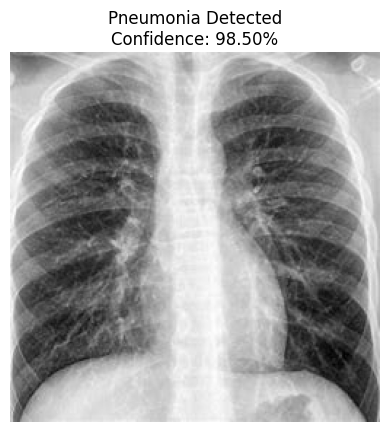

In [9]:
# Install necessary libraries
!pip install -q tensorflow matplotlib

import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from google.colab import files
import matplotlib.pyplot as plt

# Load the pre-trained model
MODEL_PATH = '/content/pneumonia_classifier_model.keras'
model = load_model(MODEL_PATH)

def preprocess_image(image_path):
    """
    Preprocess the uploaded image to match the model's input size and scale.
    """
    image = load_img(image_path, color_mode="grayscale", target_size=(28, 28))  # Load and resize image
    image = img_to_array(image) / 255.0  # Normalize pixel values
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    return image

def predict_uploaded_image():
    """
    Prompt the user to upload an image, preprocess it, and predict pneumonia presence.
    """
    print("Please upload an X-ray image for pneumonia detection.")
    uploaded = files.upload()  # Prompt user to upload a file

    for file_name in uploaded.keys():
        # Load and preprocess the image
        image_path = file_name
        processed_image = preprocess_image(image_path)

        # Predict using the model
        prediction = model.predict(processed_image)[0][0]

        # Determine the result
        if prediction > 0.5:
            result = "Pneumonia Detected"
            confidence = f"Confidence: {prediction * 100:.2f}%"
        else:
            result = "No Pneumonia Detected"
            confidence = f"Confidence: {(1 - prediction) * 100:.2f}%"

        # Display the result and the image
        print(result)
        print(confidence)

        # Show the uploaded image
        image = load_img(image_path, color_mode="grayscale")
        plt.imshow(image, cmap='gray')
        plt.title(f"{result}\n{confidence}")
        plt.axis('off')
        plt.show()

# Call the function to allow the user to upload an image and get predictions
predict_uploaded_image()
